# Terrestrial water storage (TWS) time series derived from GRACE


Authors: Kiana and Iniobong

# Intorduction and goal of the exercise

In this exercise, the goal is to get started with a jupyter python notebook, and learn how to download GRACE level-2 data (monthly gravity field solution) from the ITSG dataset as follows.

To use this notebook, the shxarray package should be installed from https://github.com/ITC-Water-Resources/shxarray or from https://pypi.org/project/shxarray/

The data used in this tutorial is from ITSG Level-2 datasets https://www.tugraz.at/institute/ifg/downloads/gravity-field-models/itsg-grace2018#c194128

### Computing Terrestrial Water Storage:

A monthly GRACE gravity field solution is expressed by a set of spherical harmonic (SH) coefficients complete to a certain degree named as Stokes coefficients. Stokes coefficients from the GRACE solutions (downloaded from ITSG in this tutorial) can be converted to Terrestrial Water Storage (TWS) which is the vertically integrated total amount of water stored on and beneath the land surface. It includes groundwater, soil moisture, surface water, snow and ice, and water stored in the atmosphere.

In order to derive TWS from level-2 stokes coefficients, several processing steps are often needed to obtain good results. The steps are described as below:

* 01-  Apply degree corrections

* 02- Obtain time-anomalies by subtracting a static gravity field from the monthly solutions (more details about the static gravity filed models: https://icgem.gfz-potsdam.de/tom_longtime and https://ggos.org/item/global-gravity-field-models/)

* 03- Apply a filter to GRACE Level-2 data to minimize noise 

In [1]:
%env OPENBLAS_NUM_THREADS=4

env: OPENBLAS_NUM_THREADS=4


# Step 1: Load the necessary python modules (10 points)

%load_ext autoreload 
%autoreload 2

In [1]:
# Put your code here

# Step 2: Read monthly solutions Stokes coefficients form directory path

In [3]:
def load_icgem_files(datadir):

    gsm = []
    deg1_terms = []
    term_c20 = []
    files = os.listdir(datadir)

    for file in files:
        file_path = os.path.join(datadir, file)
        if "ITSG-Grace2018" in file:
            gsm.append(xr.open_dataset(file_path, engine="icgem"))
        if "c20" in file:
            term_c20.append(xr.open_dataset(file_path, engine="icgem"))
        elif "degree1" in file:
            deg1_terms.append(xr.open_dataset(file_path, engine="icgem"))  ## Depending on the gravitational spherical harmonic model, the engine can be = "gsmv6"

    if deg1_terms and term_c20:
        deg1_cnm = xr.concat(deg1_terms, dim="time").sortby("time")
        c20_cnm = xr.concat(term_c20, dim="time").sortby("time")
        return deg1_cnm, c20_cnm
    else:
        dsgsm = xr.concat(gsm, dim="time")
        dsgsm = dsgsm.sortby('time')
        return dsgsm

In [4]:
datadir = '~/shared/Waterflux/data/ITSG_grace2018/monthly/monthly_deg120'
#datadir = '~/shared/Waterflux/data/ITSG_grace2018/monthly/monthly_deg96'

datadir = os.path.expanduser(datadir)

ds = load_icgem_files(datadir)
ds

<xarray.Dataset>
Dimensions:  (time: 162, nm: 14641)
Coordinates:
  * nm       (nm) object MultiIndex
  * n        (nm) int64 0 1 1 1 2 2 2 2 2 ... 120 120 120 120 120 120 120 120
  * m        (nm) int64 0 0 1 -1 0 1 -1 2 ... -117 118 -118 119 -119 120 -120
  * time     (time) datetime64[ns] 2002-04-15T12:00:00 ... 2017-06-15T12:00:00
Data variables:
    cnm      (time, nm) float64 1.0 0.0 0.0 ... -5.023e-10 -1.122e-09 -1.497e-09
    sigcnm   (time, nm) float64 0.0 0.0 0.0 ... 1.601e-10 1.348e-10 1.341e-10
Attributes:
    nmaxfile:   120
    nmax:       120
    format:     icgem
    norm:       fully_normalized
    gm:         398600441500000.0
    re:         6378136.3
    modelname:  ITSG-Grace2018_n120_2012-09

# Step 3: Apply degree corrections (20 points)

## Degree 1 terms correction
One problem of the monthly solutions is that they absence of degree-1 coefficients (ΔC10, ΔC11 and ΔS11), which correspond to the geocentre motion defined as the displacement of the center of mass of the whole Earth system (CM) with respect to the center of figure of the solid Earth (CF) .  Excluding the degree-1 contribution leads to significant errors in terrestrial water storage (TWS) estimates.

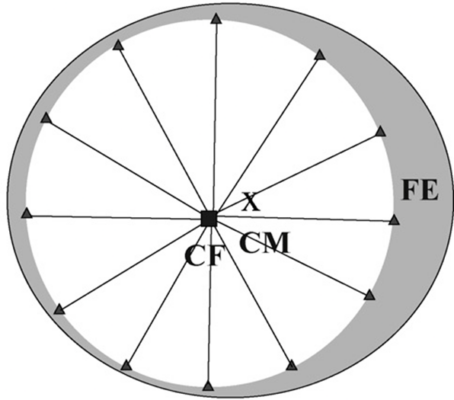

For some inspiration:
https://blogs.egu.eu/divisions/g/2024/01/19/bits-and-bites-of-geodesy-where-is-the-centre-of-the-earth-why-do-we-care/


## C20 coefficient correction 
Another problem of GRACE monthly solutions is that the C20 coefficient is subject to large uncertainties due to the GRACE orbital geometry and the systematic errors in the accelerometer data. Therefore, to estimate TWS  anomalies, we correct for these coefficients by replacing them with independently estimated degree-1 terms and C20 coefficient from  satellite laser ranging (SLR).

In [5]:
datadir = os.path.expanduser('~/shared/Waterflux/data/ITSG_grace2018/monthly/monthly_background')
ds_deg1,ds_c20 = load_icgem_files(datadir)

#### 1. C20 correction

In [6]:
# Put your code here

#### 2. degree 1 terms corrections

In [8]:
# Put your code here

# Step 4: Read the time-invariable static gravity field data (20 points)

##### 1. read static gravity field data and subtract it from data

In [1]:
# put your code

#### 2. Filter degree zero as we do not need this coefficient in derivation of TWS time series

In [11]:
# put your code here

# Step 5: Calculate terrestrial water storage change in spectral domain (5 points)

In [4]:
# Put your code here

# Step 6: Calculate terrestrial water storage change in spatial domain globally

In [15]:
dsgrd=datws.sh.synthesis().to_dataset(name="tws")

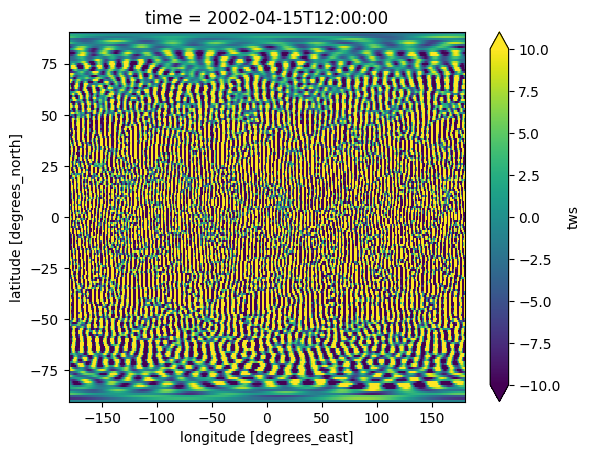

In [16]:
islice=0
dsgrd.tws[:,:,islice].plot(vmin=-10, vmax =10)
dsgrd
lats = dsgrd['lat'].values
lons = dsgrd['lon'].values

# Step 7: Apply filters and visualize them (20 points)

In [17]:
# Put your code here

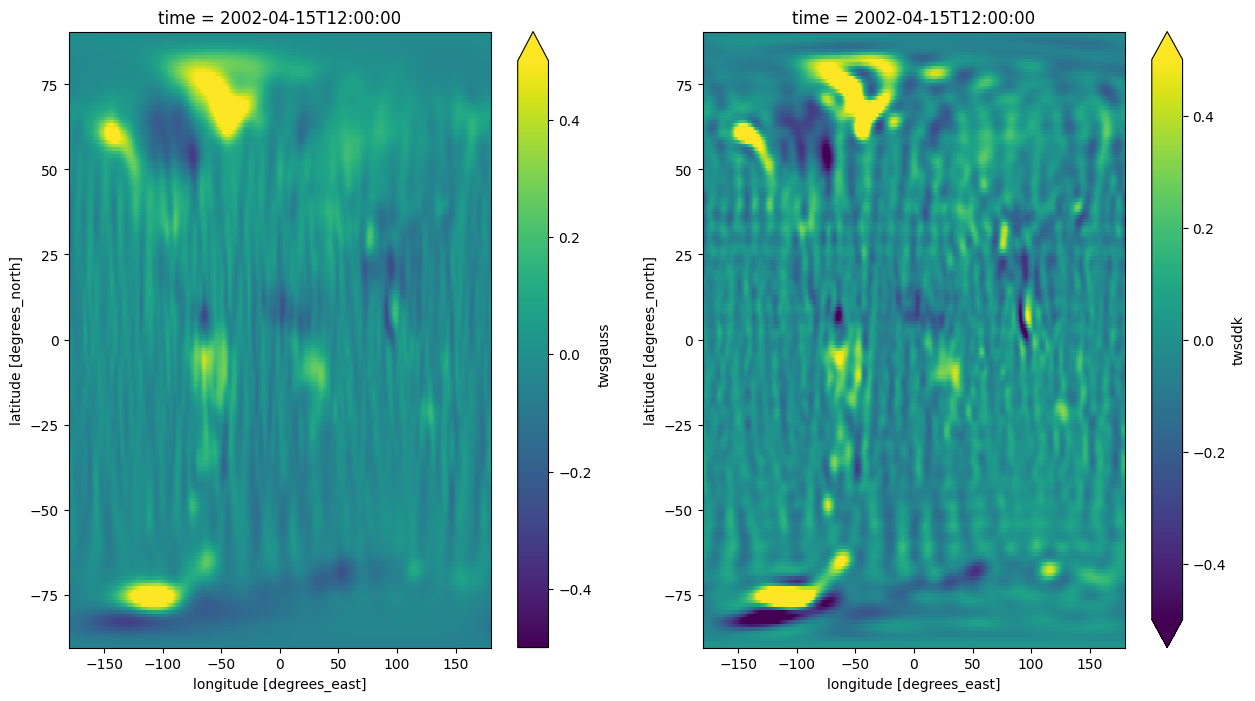

In [18]:
# Put your code here

# Step 8: Save TWS time series to use it for tutorial_2 (5 points)

In [ ]:
# Put your code here

# Bonus Step 9: Use other filters and derive grid based TWS time series (40 points)

# Hints & Tips:

Go to:https://github.com/strawpants/GRACE-filter

* 01- Use three DDK filters with degree power law and explain your results (e.g., DDK3, DDk4, ...)

* 02- Do the same step for the Gaussian filter with different radius values and explain your results (e.g., Gauss250, Gauss400, ...)